# Data Mining Project - Final Report

# Exploratory data analytics and predictive modelling on data from *Food.com*

# Submitted by :
## Anit Gupta
## Susanth Sampath Kumar Dasari
## Sonam Dawani

In this analysis, we are performing exploratory data analytics and predictive modelling to solve some business needs we identified in Food.com and also solutions that are helpful to their customers.

We are using data from the following kaggle project: https://www.kaggle.com/shuyangli94/food-com-recipes-and-user-interactions

**Food.com** is a place where you can find recipies for all ocassions. It is a social networking platform for people who like to try new recipes and people who like to make new recipes. 

The website has a lot of features that attract people and retain them. There are sections where you can find ratings and reviews for the recipes which makes it perferct for people to double-check that is the recipe they want.

The data from kaggle website has Recipes, Interactions and User information. We are only considering Recipes and Interactions for our analysis. Interations being the reviews and ratings posted for each recipe.

### RUN BELOW & CLICK THE BUTTON  TO TOGGLE  CODE 
##### This is because we have a big piece of code.

In [2]:
import ipywidgets as widgets
from IPython.display import display, HTML

javascript_functions = {False: "hide()", True: "show()"}
button_descriptions  = {False: "Show code", True: "Hide code"}


def toggle_code(state):

    """
    Toggles the JavaScript show()/hide() function on the div.input element.
    """

    output_string = "<script>$(\"div.input\").{}</script>"
    output_args   = (javascript_functions[state],)
    output        = output_string.format(*output_args)

    display(HTML(output))


def button_action(value):

    """
    Calls the toggle_code function and updates the button description.
    """

    state = value.new

    toggle_code(state)

    value.owner.description = button_descriptions[state]


state = False
toggle_code(state)

button = widgets.ToggleButton(state, description = button_descriptions[state])
button.observe(button_action, "value")

display(button)

print("Refernces :https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer")

ToggleButton(value=False, description='Show code')

Refernces :https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer


Let's start with importing libraries

## Importing necessary Libraries

In [ ]:
import pandas as pd
pd.set_option('precision', 2)
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import re
import time
from pprint import pprint

### sklearn Pre-processing
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.exceptions import DataConversionWarning

### sklearn Metrics
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, make_scorer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### sklearn models
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor

### Others
import nltk
from nltk.stem import WordNetLemmatizer
from subprocess import check_output
from apyori import apriori
import warnings

#!pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install 

## Reading in the data

We will read the recipes data which is in the csv format directly into a dataframe and explore it a bit.

In [5]:
recipeDataUrl = 'RAW_recipes.csv'
rawData = pd.read_csv(recipeDataUrl,low_memory=False)
recipeColumns = rawData.columns
print(recipeColumns)
print("Number of columns: ",len(recipeColumns))
rawData.head()

Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients'],
      dtype='object')
Number of columns:  12


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [6]:
rawData.dtypes

name              object
id                 int64
minutes            int64
contributor_id     int64
submitted         object
tags              object
nutrition         object
n_steps            int64
steps             object
description       object
ingredients       object
n_ingredients      int64
dtype: object

The attributes **id** and **contributor_id** are clearly identifiers, so let's convert them into string objects.

Also let's set the **recipe id** as the index for each row in our dataset.

In [7]:
rawData = rawData.astype({'id': 'object','contributor_id': 'object'})
rawData['id_copy'] = rawData['id']
rawData1 = rawData.set_index('id')

In [8]:
print("Number of total recipes: ",rawData["id"].count())

Number of total recipes:  231637


In [9]:
print("Number of contributors: ",rawData["contributor_id"].nunique())

Number of contributors:  27926


Let's describe the numerical fields in the data and look at their distributions.

In [10]:
rawData.describe()

,minutes,n_steps,n_ingredients
count,2.32e+05,231637.00,231637.00
mean,9.40e+03,9.77,9.05
std,4.46e+06,6.00,3.73
min,0.00e+00,0.00,1.00
25%,2.00e+01,6.00,6.00
50%,4.00e+01,9.00,9.00
75%,6.50e+01,12.00,11.00
max,2.15e+09,145.00,43.00


## Interactions data

### Reading in the data

In [11]:
reviewDataUrl = 'RAW_interactions.csv'
reviewData = pd.read_csv(reviewDataUrl,low_memory=False)
reviewColumns = reviewData.columns
print(reviewColumns)
print("Number of columns: ",len(reviewColumns))
reviewData.head()

Index(['user_id', 'recipe_id', 'date', 'rating', 'review'], dtype='object')
Number of columns:  5


,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [12]:
print("Total number of reviews: ",reviewData["recipe_id"].count())

Total number of reviews:  1132367


In [13]:
print("Total number of contributors: ",reviewData["user_id"].nunique())

Total number of contributors:  226570


**Summarize the interactions data based on recipe_id, so that we might have the mean rating for each recipe and also the number of reviews posted for each recipe.**

In [14]:
rating = reviewData[['recipe_id','rating']].groupby('recipe_id',as_index=False)['rating']\
                    .agg(['mean','count'])\
                    .rename(columns={"mean": "mean_rating", "count": "review_count"})
rating.head()

,mean_rating,review_count
recipe_id,,
38,4.25,4
39,3.00,1
40,4.33,9
41,4.50,2
43,1.00,1


### Joining Interations data with the original recipe data

In [15]:
rawData2 = rawData1.join(rating)
print(rawData2.columns)
rawData2.head(5)

Index(['name', 'minutes', 'contributor_id', 'submitted', 'tags', 'nutrition',
       'n_steps', 'steps', 'description', 'ingredients', 'n_ingredients',
       'id_copy', 'mean_rating', 'review_count'],
      dtype='object')


,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,id_copy,mean_rating,review_count
id,,,,,,,,,,,,,,
137739,arriba baked winter squash mexican style,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,137739,5.0,3
31490,a bit different breakfast pizza,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,31490,3.5,4
112140,all in the kitchen chili,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,112140,4.0,1
59389,alouette potatoes,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,59389,4.5,2
44061,amish tomato ketchup for canning,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,44061,5.0,1


## Pre-processing of the data

The data in it’s original format has features like nutritional values, ingredients, steps as lists and because of reading in from the CSV format, the lists are read and understood as strings by pandas rather than a python list object!

Let's convert the necessary fields to a more usable formats.

### Converting ingredients to usable strings

In [16]:
def get_list(x):
    strlistF = []
    strlist = eval(x)
    for item in strlist:
        if len(item) > 2 and not re.search("[^a-zA-Z\s]",item):
            temp1 = item.strip()
            temp2 = temp1.replace(" ","_")
            strlistF.append(temp2)

    return(" ".join(strlistF))


rawData2['ingr_str'] = rawData2['ingredients'].apply(get_list)
rawData2.dtypes

name               object
minutes             int64
contributor_id     object
submitted          object
tags               object
nutrition          object
n_steps             int64
steps              object
description        object
ingredients        object
n_ingredients       int64
id_copy            object
mean_rating       float64
review_count        int64
ingr_str           object
dtype: object

### Flattening the nutritional values to columns

In [17]:
allNutriList=['cal', 'totalFat', 'sugar', 'sodium', 'protein', 'satFat', 'carbs']

recpNutr = pd.DataFrame(rawData1['nutrition'].apply(eval).to_list(),\
                        index=rawData1.index\
                        ,columns=allNutriList)

rawData3 = rawData2.join(recpNutr)
RAW_recipes = rawData3.copy()
print(RAW_recipes.columns)
RAW_recipes.head(5)

Index(['name', 'minutes', 'contributor_id', 'submitted', 'tags', 'nutrition',
       'n_steps', 'steps', 'description', 'ingredients', 'n_ingredients',
       'id_copy', 'mean_rating', 'review_count', 'ingr_str', 'cal', 'totalFat',
       'sugar', 'sodium', 'protein', 'satFat', 'carbs'],
      dtype='object')


,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,...,mean_rating,review_count,ingr_str,cal,totalFat,sugar,sodium,protein,satFat,carbs
id,,,,,,,,,,,,,,,,,,,,,
137739,arriba baked winter squash mexican style,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",...,5.0,3,winter_squash mexican_seasoning mixed_spice ho...,51.5,0.0,13.0,0.0,2.0,0.0,4.0
31490,a bit different breakfast pizza,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",...,3.5,4,prepared_pizza_crust sausage_patty eggs milk s...,173.4,18.0,0.0,17.0,22.0,35.0,1.0
112140,all in the kitchen chili,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",...,4.0,1,ground_beef yellow_onions diced_tomatoes tomat...,269.8,22.0,32.0,48.0,39.0,27.0,5.0
59389,alouette potatoes,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",...,4.5,2,spreadable_cheese_with_garlic_and_herbs new_po...,368.1,17.0,10.0,2.0,14.0,8.0,20.0
44061,amish tomato ketchup for canning,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",...,5.0,1,tomato_juice apple_cider_vinegar sugar salt pe...,352.9,1.0,337.0,23.0,3.0,0.0,28.0


## Exploring the data

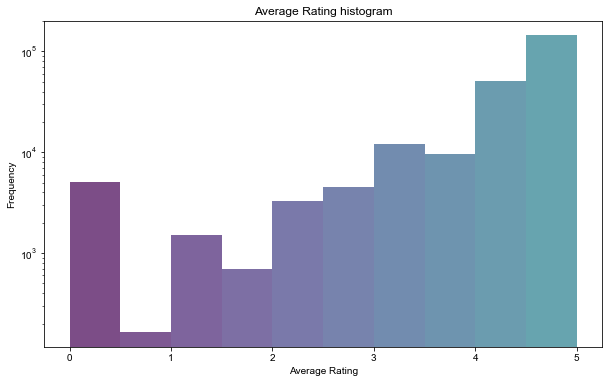

In [18]:
fig8,ax = plt.subplots(1,figsize=(10,6))
plt.style.use('seaborn-darkgrid')
cmap_list = plt.get_cmap('viridis').colors

n, bins, patches = ax.hist(rawData3['mean_rating'],alpha=0.7)

# apply the same color for each class to match the map
idx = 0
for c, p in zip(bins, patches):
    plt.setp(p, 'facecolor', cmap_list[idx])
    idx+=12

ax.set(xlabel='Average Rating', ylabel='Frequency', title="Average Rating histogram", yscale="log")
plt.savefig('Rating histogram.png', bbox_inches='tight')
plt.show()

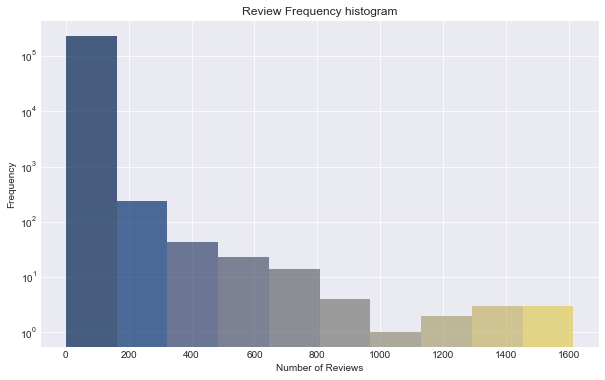

In [19]:
fig8,ax = plt.subplots(1,figsize=(10,6))
plt.style.use('seaborn-deep')
cmap_list = plt.get_cmap('cividis').colors

n, bins, patches = ax.hist(rawData3['review_count'],alpha=0.7)

# apply the same color for each class to match the map
idx = 0
for c, p in zip(bins, patches):
    plt.setp(p, 'facecolor', cmap_list[idx])
    idx+=25

ax.set(xlabel='Number of Reviews', ylabel='Frequency', title="Review Frequency histogram", yscale="log")
plt.savefig('Review histogram.png', bbox_inches='tight')
plt.show()

In [20]:
rawData3.sort_values("review_count",ascending=False).head(1)

,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,...,mean_rating,review_count,ingr_str,cal,totalFat,sugar,sodium,protein,satFat,carbs
id,,,,,,,,,,,,,,,,,,,,,
2886,best banana bread,65,1762,1999-09-26,"['time-to-make', 'course', 'main-ingredient', ...","[272.8, 16.0, 97.0, 14.0, 7.0, 31.0, 14.0]",13,"['remove odd pots and pans from oven', 'prehea...",you'll never need another banana bread recipe ...,"['butter', 'granulated sugar', 'eggs', 'banana...",...,4.19,1613,butter granulated_sugar eggs bananas baking_so...,272.8,16.0,97.0,14.0,7.0,31.0,14.0


In [21]:
numeric_cols = ['minutes', 'n_steps', 'n_ingredients', 'cal', 'totalFat', 'sugar', 'sodium', 'protein', 'satFat', 'carbs']

In [22]:
rawData3 = rawData3.reset_index()

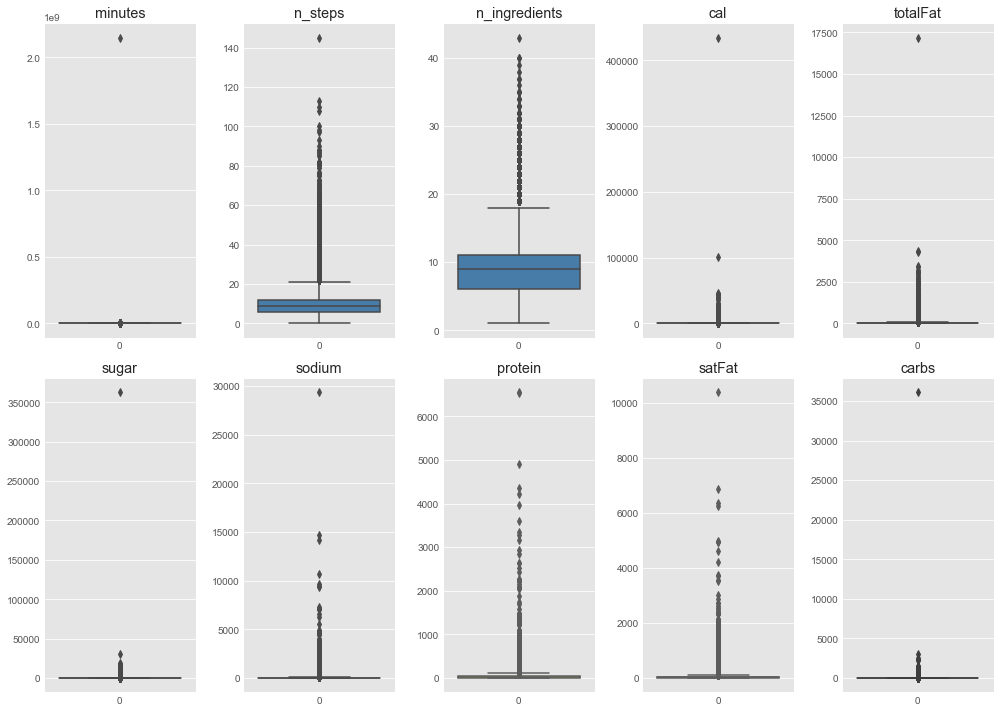

In [23]:
plt.style.use('ggplot')
fig, axis = plt.subplots(2,5,figsize=(14,10))
axis = axis.ravel()
colors = plt.get_cmap('Set1',15).colors
for i,ax in enumerate(axis):
    sns.boxplot(data=rawData3[numeric_cols[i]],color=colors[i+1],ax=ax)
    ax.set(title=numeric_cols[i])
plt.tight_layout()
plt.savefig('boxplots.png')
plt.show()

The above boxplots represent the distributions of the numeric features in our data. In all of the features there are few extreme values that are completely skewing the distributions. Such values can be called as outliers.

We will need to handle these outliers before moving forward with our analysis.

### Performing clamping technique to remove outliers

We can see outliers in above box plot. But how is the boundary for the outlier is decided (the two horizontal lines which we see before the outliers)? So those values are decided by the the Inter Quartile Range (IQR) which is differenec of first and third quartile. 
So using that I can set my lower and upper bound as :
lower bound = Q1 - 1.5 * IQR
upper bound = Q3 + 1.5 * IQR

Tha values out of these range is considered as outliers and we can remove them. So let's do the same for our data.

In [24]:
# Removing values according to IQR
Col_to_clamp=['n_steps','minutes','n_ingredients','cal', 'totalFat', 'sugar',   'sodium', 'protein', 'satFat', 'carbs']
for col in Col_to_clamp:
    IQR = RAW_recipes[col].quantile(0.75) - RAW_recipes[col].quantile(0.25)
    colmax = RAW_recipes[col].quantile(0.75) + 2.5 * IQR
    colmin = RAW_recipes[col].quantile(0.25) - 2.5 * IQR
    RAW_recipes = RAW_recipes[ (RAW_recipes[col] < colmax) & (RAW_recipes[col] > colmin) ]
# RAW_recipes=RAW_recipes.reset_index(drop=True)

In [25]:
RAW_recipes.describe()

,minutes,n_steps,n_ingredients,mean_rating,review_count,cal,totalFat,sugar,sodium,protein,satFat,carbs
count,177201.00,177201.00,177201.00,177201.00,177201.00,177201.00,177201.00,177201.00,177201.00,177201.00,177201.00,177201.00
mean,40.92,9.17,8.88,4.37,4.86,298.81,22.17,35.91,18.01,26.42,27.30,8.96
std,30.37,4.83,3.52,0.96,16.90,190.97,19.46,39.98,18.25,27.35,27.49,7.24
min,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,20.00,6.00,6.00,4.00,1.00,151.90,7.00,8.00,4.00,6.00,6.00,3.00
50%,35.00,8.00,9.00,4.71,2.00,264.30,17.00,20.00,12.00,15.00,18.00,7.00
75%,55.00,12.00,11.00,5.00,4.00,409.90,32.00,49.00,27.00,42.00,40.00,13.00
max,176.00,26.00,23.00,5.00,1613.00,1338.20,105.00,183.00,91.00,138.00,131.00,37.00


In [73]:
print("The number of recipes remaining after handling outliers:", RAW_recipes['name'].count())

The number of recipes remaining after handling outliers: 177201


Let's look at distributions of some features before and after handling outliers through histograms.

**Minutes feature before**

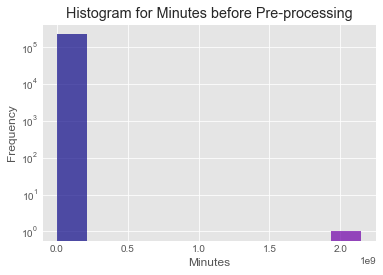

In [27]:
fig8,ax = plt.subplots(1)
plt.style.use('seaborn-deep')
cmap_list = plt.get_cmap('plasma').colors

n, bins, patches = ax.hist(rawData['minutes'],alpha=0.7)

# apply the same color for each class to match the map
idx = 0
for c, p in zip(bins, patches):
    plt.setp(p, 'facecolor', cmap_list[idx])
    idx+=6

ax.set(xlabel='Minutes', ylabel='Frequency',title="Histogram for Minutes before Pre-processing",yscale="log")
plt.savefig('minutes_before.png', bbox_inches='tight')
plt.show()

**Minutes feature after**

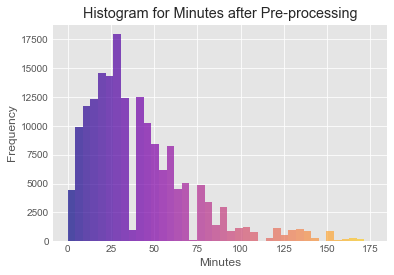

In [28]:
fig8,ax = plt.subplots(1)
plt.style.use('seaborn-darkgrid')
cmap_list = plt.get_cmap('plasma').colors

n, bins, patches = ax.hist(RAW_recipes['minutes'],bins=40,alpha=0.7)

# apply the same color for each class to match the map
idx = 0
for c, p in zip(bins, patches):
    plt.setp(p, 'facecolor', cmap_list[idx])
    idx+=6

ax.set(xlabel='Minutes', ylabel='Frequency',title="Histogram for Minutes after Pre-processing")
plt.savefig('minutes_after.png', bbox_inches='tight')
plt.show()

**n_steps feature before**

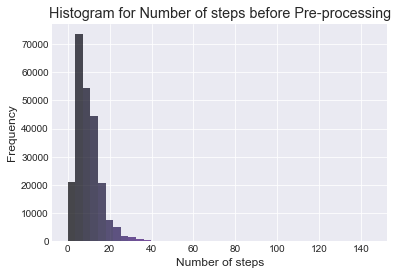

In [29]:
fig8,ax = plt.subplots(1)
plt.style.use('seaborn-darkgrid')
cmap_list = plt.get_cmap('magma').colors

n, bins, patches = ax.hist(rawData['n_steps'],bins=40,alpha=0.7)

# apply the same color for each class to match the map
idx = 0
for c, p in zip(bins, patches):
    plt.setp(p, 'facecolor', cmap_list[idx])
    idx+=6

ax.set(xlabel='Number of steps', ylabel='Frequency',title="Histogram for Number of steps before Pre-processing")
plt.savefig('steps_before.png', bbox_inches='tight')
plt.show()

**n_steps feature after**

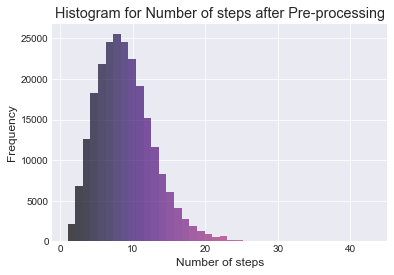

In [30]:
fig8,ax = plt.subplots(1)
plt.style.use('seaborn-darkgrid')
cmap_list = plt.get_cmap('magma').colors

n, bins, patches = ax.hist(rawData['n_ingredients'],bins=40,alpha=0.7)

# apply the same color for each class to match the map
idx = 0
for c, p in zip(bins, patches):
    plt.setp(p, 'facecolor', cmap_list[idx])
    idx+=6

ax.set(xlabel='Number of steps', ylabel='Frequency',title="Histogram for Number of steps after Pre-processing")
plt.savefig('steps_after.png', bbox_inches='tight')
plt.show()

Checking to see if there are any Null values that we need to handle.

In [31]:
print("Checking if Null values exist:")
print(RAW_recipes.isnull().any())

Checking if Null values exist:
name              False
minutes           False
contributor_id    False
submitted         False
tags              False
nutrition         False
n_steps           False
steps             False
description        True
ingredients       False
n_ingredients     False
id_copy           False
mean_rating       False
review_count      False
ingr_str          False
cal               False
totalFat          False
sugar             False
sodium            False
protein           False
satFat            False
carbs             False
dtype: bool


Let's look at the correlations between all the numerical fields in original data**

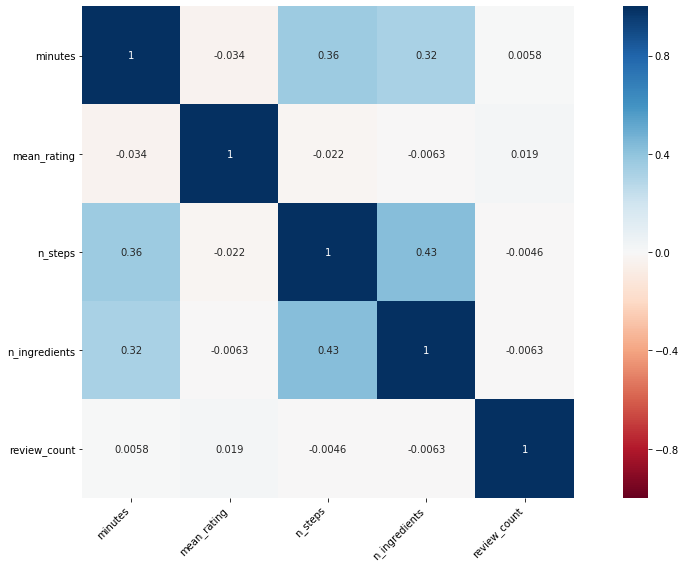

In [74]:
fig,ax = plt.subplots(1,figsize=(14,8))
sns.heatmap(RAW_recipes[["minutes","mean_rating","n_steps","n_ingredients","review_count"]].corr(), vmin=-1, vmax=1, center=0, annot=True, cmap=plt.get_cmap('RdBu'), square=True, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels(),rotation=0)
plt.savefig('correlation_heat_map.png', bbox_inches='tight')
plt.tight_layout()

There are no significant correlations between any of these fields, making them very independent of each other. This raises two situations:
1. Since there are no correlations, predictive models are more relaible.
2. Since there are no correlations, it will be hard to extract insights through relationships between various fields.

## Feature Engineering Cuisine

It was to our suprise to learn that Food.com doesn't contain the information about a recipe's cuisine. 

We can try to introduce the recipe information using the basic instincts of **Data Engineering** and the concepts of **Data Mining**.

## Why ?
We are using the dataset from one of the famous website in its domain, food.com, It provides recipies for thousands of dishes (to be precise: 231637). So basically this website have recipies for every event you can think of such as pool parties, christmas holidays and so on.
<p>
But it was to our suprise that they dont have any filter for cuisines. Even in their dataset they dont have any field which they can leverage to have this extended feature on their website.
<p>

Hence we move ahead to fix this problem using **data engineering** basic instincts and the skills we have learnt in the **Data Minning**.

### What Is Data Engineering ?
Data engineering is the aspect of data science that focuses on **practical applications of data collection and analysis**. For all the work that data scientists do to answer questions using large sets of information, there have to be mechanisms for **collecting and validating that information**.


Ian Buss, principal solutions architect at Cloudera, notes that data scientists focus on finding new insights from a data set, while data engineers are concerned with the production readiness of that data and all that comes with it: **formats, scaling, resilience and security**

## So lets start.. 

First we have analysed the data set and we found that ingridents would be the best field in the exsisting dataset to use and leverage and predict cuisine for every recipie. 

Then using one similar dataset where we had ingridients and cuisines we trained our model upto the accuracy of ~75%


## Major steps and strategy 

1. We have 3 files in total which are as follows : 
    * Train.json : this is with ingridients and cuisines 
    * Test.json : This is with ingridients only
    * RAW_recipes.csv : This is the food.com data set in which we intend to add cuisine for each recipie.
2. So using Train.csv we split this dataset into test and train<br>
3. We apply multiple model and check and get maximum accuracy.(in our case random forest classifier performs best).<br>
4. Having done that we can now proceed on the dummy data set Test.csv this is just an extra step that where we are predicting cuisines from the ingridients and checking manually that every thing is working good before we scale our solution to an entire dataset.<br>
5. After we have predicted cuisine now its time to predict the cuisines of entire data set. so we run the predict function giving tf-idf matrix for the ingridients.<br>
6. Once we have the predictions we can add this column to the main dataframe.<br>



## Reading  CSVs 

Reading train.json which has all the data bot ingridients and cuisines

In [34]:
train = pd.read_json('train.json')
train.head()
train.count()

cuisine        39774
id             39774
ingredients    39774
dtype: int64

Reading test.json which has only ingridients. this is our dummy test file to see our model works correctly.

In [35]:
test = pd.read_json('test.json')
test.head()
test.count()

id             9944
ingredients    9944
dtype: int64

In [36]:
df_R=rawData2.copy()
df_R.head()
df_R.count()

name              231636
minutes           231637
contributor_id    231637
submitted         231637
tags              231637
nutrition         231637
n_steps           231637
steps             231637
description       226658
ingredients       231637
n_ingredients     231637
id_copy           231637
mean_rating       231637
review_count      231637
ingr_str          231637
dtype: int64

Here comes the important part and we must take care since we are dealing with categorical data we need to vectorize our data. For that wew are using TF-IDF.

## What is TF-IDF ?
Tf-idf is a very common technique for determining roughly what each document in a set of documents is “about”. It cleverly accomplishes this by looking at two simple metrics: tf (term frequency) and idf (inverse document frequency).<br>

**Term frequency :** It is the proportion of occurrences of a specific term to total number of terms in a document.

**Inverse document frequency :** It is the inverse of the proportion of documents that contain that word/phrase.



In [37]:
train['ingredient_list'] = [','.join(z).strip() for z in train['ingredients']]

ingredients = train['ingredient_list']

vectorizer = TfidfVectorizer(stop_words='english')

tfidf_matrix= vectorizer.fit_transform(ingredients).todense()
cuisines = train['cuisine']

print("TF-IDF Matrix looks like below :\n",tfidf_matrix,"\n")
print("Cuisine looks like below :\n",cuisines.head(),"\n")

TF-IDF Matrix looks like below :
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 

Cuisine looks like below :
 0          greek
1    southern_us
2       filipino
3         indian
4         indian
Name: cuisine, dtype: object 



## Split and Train

Now that we have data ready which can be further used to train our model we will move ahead straight to train our model. The only thing is since we are using Random Forest Classifier we can pass mulitple parameters with different configuration. So in order to get the best suitable model we are using **GRID SEARCH**

### What is Grid Search?
Grid search is the process of performing hyper parameter tuning in order to determine the optimal values for a given model. This is significant as the performance of the entire model is based on the hyper parameter values specified.

You can change these values and experiment more to see which value ranges give better performance. A cross validation process is performed in order to determine the hyper parameter value set which provides the best accuracy levels.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, cuisines, test_size=0.2)
param_grid = {'n_estimators': [100]}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

We are here checking the model score and the best parameters to use.

In [39]:
print("best param",grid.best_params_)
print("best score",grid.best_score_)
print("best estimator",grid.best_estimator_)

best param {'n_estimators': 100}
best score 0.7395581256481977
best estimator RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


## How accurate is the model ?

To answer the above question we are evaluation our model on 3 basic parameters whcih are :
* The Score of the model (grid.score)
* The Accuracy of the model (accuracy.score)
* Classification rate (Using classification report)

In [40]:
print("model score : ",grid.score(X_test, y_test))
y_pred = grid.predict(X_test)
print("model accuracy : ",accuracy_score(y_test, y_pred))
cuisines = train['cuisine'].value_counts().index
print(classification_report(y_test, y_pred, target_names=cuisines))

model score :  0.7458202388434947
model accuracy :  0.7458202388434947
              precision    recall  f1-score   support

     italian       0.84      0.41      0.55        90
     mexican       0.70      0.21      0.32       170
 southern_us       0.80      0.71      0.75       293
      indian       0.69      0.88      0.78       551
     chinese       0.80      0.50      0.61       134
      french       0.61      0.50      0.55       537
cajun_creole       0.84      0.54      0.66       237
        thai       0.84      0.89      0.86       608
    japanese       0.85      0.36      0.51       155
       greek       0.71      0.93      0.81      1556
     spanish       0.92      0.53      0.67       102
      korean       0.86      0.61      0.72       270
  vietnamese       0.92      0.59      0.72       171
    moroccan       0.83      0.93      0.88      1300
     british       0.82      0.62      0.71       154
    filipino       0.78      0.25      0.38        85
       iri

Now as we have disscussed multiple times earlier our model is ready to be deployed and we can start predicting the cuisine given the ingridents. We just have to make sure that since we trained our model with the TF_IDF vectorizer we must use the same for predictions.

Using our dummy test dataset we first convert the ingredients to the vector and then pass it to grid.predict()
this will give us the cuisine.

In [41]:
test['ingredient_list'] = [','.join(z).strip() for z in test['ingredients']]
test_ingredients = test['ingredient_list']
test_tfidf_matrix = vectorizer.transform(test_ingredients)
test_cuisines = grid.predict(test_tfidf_matrix)
test['cuisine'] = test_cuisines
test.iloc[7:8,:]

,id,ingredients,ingredient_list,cuisine
7,41217,"[ground ginger, white pepper, green onions, or...","ground ginger,white pepper,green onions,orange...",chinese


Now we can see from the above modified Dataframe that our model is predicting things quite nicely. So we will move on to applying the same model on the entire data set.

We just need to keep in mind the same thing that since we trained our model with the TF_IDF vectorizer we must use the same for predictions.

In [42]:
df_R['ingredient_list'] = [''.join(z).strip() for z in df_R['ingredients']]
df_R_ingredients = df_R['ingredient_list']
df_R_tfidf_matrix = vectorizer.transform(df_R_ingredients)
df_R_cuisines = grid.predict(df_R_tfidf_matrix)
df_R['cuisine'] = df_R_cuisines
df_R.head()

,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,id_copy,mean_rating,review_count,ingr_str,ingredient_list,cuisine
id,,,,,,,,,,,,,,,,,
137739,arriba baked winter squash mexican style,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,137739,5.0,3,winter_squash mexican_seasoning mixed_spice ho...,"['winter squash', 'mexican seasoning', 'mixed ...",italian
31490,a bit different breakfast pizza,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,31490,3.5,4,prepared_pizza_crust sausage_patty eggs milk s...,"['prepared pizza crust', 'sausage patty', 'egg...",italian
112140,all in the kitchen chili,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,112140,4.0,1,ground_beef yellow_onions diced_tomatoes tomat...,"['ground beef', 'yellow onions', 'diced tomato...",mexican
59389,alouette potatoes,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,59389,4.5,2,spreadable_cheese_with_garlic_and_herbs new_po...,"['spreadable cheese with garlic and herbs', 'n...",italian
44061,amish tomato ketchup for canning,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,44061,5.0,1,tomato_juice apple_cider_vinegar sugar salt pe...,"['tomato juice', 'apple cider vinegar', 'sugar...",southern_us


## Graph to classify recipe on the basis of the cuisines.

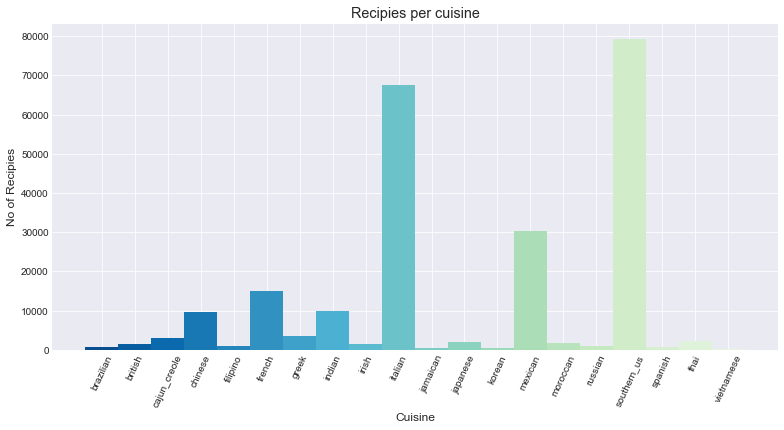

In [43]:
gb_interactions = df_R.groupby('cuisine')['cuisine']
df_cusine = pd.concat([gb_interactions.count()],axis=1)
df_cusine.rename(columns = {'cuisine':'cuisine_count'}, inplace = True) 
df_cusine=df_cusine.reset_index()

import matplotlib.pyplot 
fig8,ax = plt.subplots(1,figsize = (13,6))
ax.bar(color=sns.color_palette('GnBu_r',21),x=df_cusine['cuisine'],height=df_cusine['cuisine_count'],width=1)
ax.set(xlabel='Cuisine', ylabel='No of Recipies',title="Recipies per cuisine")
plt.xticks(rotation=65)
plt.show()

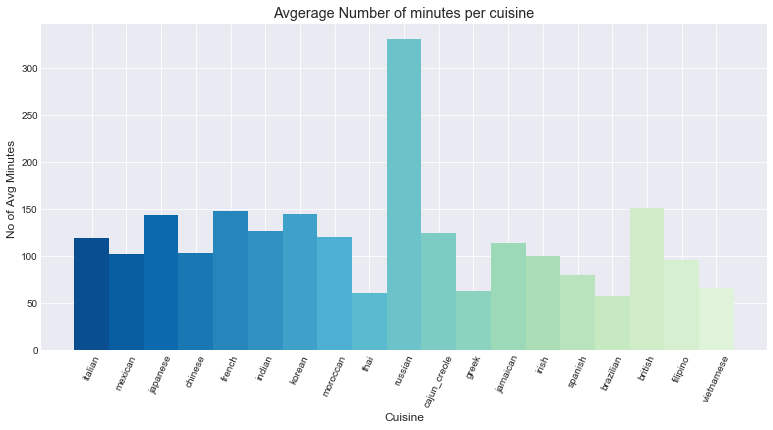

In [44]:
score=[]
for cusine in df_R['cuisine'].unique():
    df_per_cuisine=df_R[df_R['cuisine']==cusine]
    average=df_per_cuisine['minutes'].sum()/df_per_cuisine['minutes'].count()
    score.append({"cuisine":cusine,"average":average.round(2)})

avg_min_per_cuisine=pd.DataFrame(score)
avg_min_per_cuisine = avg_min_per_cuisine.drop(avg_min_per_cuisine[avg_min_per_cuisine.average > 500].index)
avg_min_per_cuisine

import matplotlib.pyplot 
fig8,ax = plt.subplots(1,figsize = (13,6))
ax.bar(color=sns.color_palette('GnBu_r',21),x=avg_min_per_cuisine['cuisine'],height=avg_min_per_cuisine['average'],width=1)
ax.set(xlabel='Cuisine', ylabel='No of Avg Minutes ',title="Avgerage Number of minutes per cuisine")
plt.xticks(rotation=65)
plt.show()


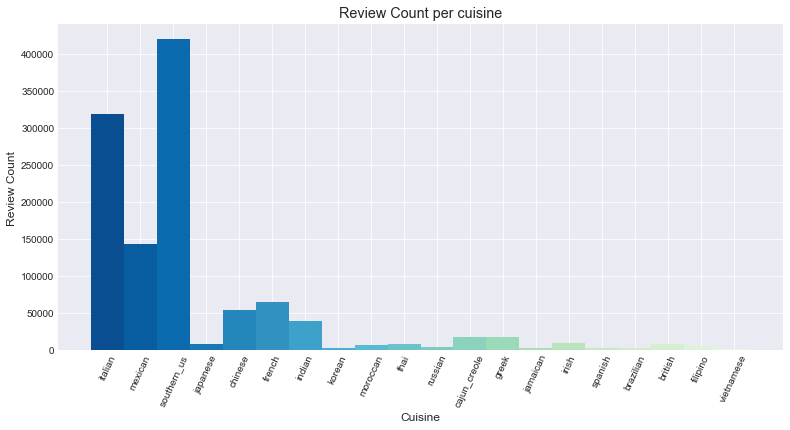

In [45]:
score=[]
for cusine in df_R['cuisine'].unique():
    df_per_cuisine=df_R[df_R['cuisine']==cusine]
    average=df_per_cuisine['review_count'].sum()
    score.append({"cuisine":cusine,"average":average.round(2)})

avg_min_per_cuisine=pd.DataFrame(score)



import matplotlib.pyplot 
fig8,ax = plt.subplots(1,figsize = (13,6))
ax.bar(color=sns.color_palette('GnBu_r',21),x=avg_min_per_cuisine['cuisine'],height=avg_min_per_cuisine['average'],width=1)
ax.set(xlabel='Cuisine', ylabel='Review Count ',title="Review Count per cuisine")
plt.xticks(rotation=65)
plt.show()

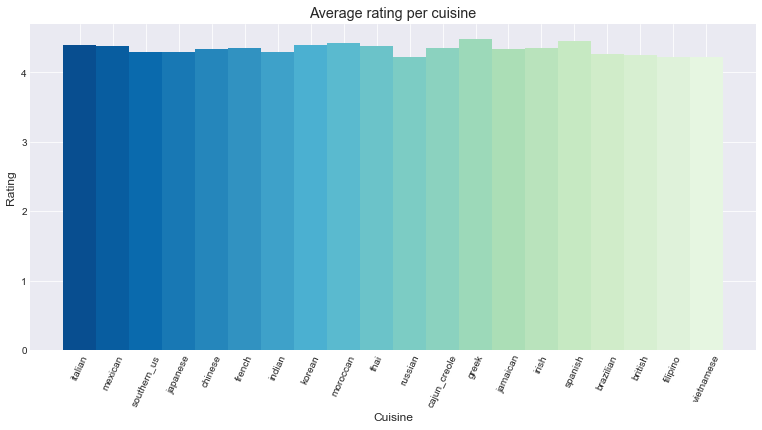

In [46]:
score=[]
for cusine in df_R['cuisine'].unique():
    df_per_cuisine=df_R[df_R['cuisine']==cusine]
    average=df_per_cuisine['mean_rating'].sum()/df_per_cuisine['mean_rating'].count()
    score.append({"cuisine":cusine,"average":average.round(2)})

avg_min_per_cuisine=pd.DataFrame(score)
avg_min_per_cuisine = avg_min_per_cuisine.drop(avg_min_per_cuisine[avg_min_per_cuisine.average > 500].index)
avg_min_per_cuisine

import matplotlib.pyplot 
fig8,ax = plt.subplots(1,figsize = (13,6))
ax.bar(color=sns.color_palette('GnBu_r',21),x=avg_min_per_cuisine['cuisine'],height=avg_min_per_cuisine['average'],width=1)
ax.set(xlabel='Cuisine', ylabel='Rating ',title="Average rating per cuisine")
plt.xticks(rotation=65)
plt.show()

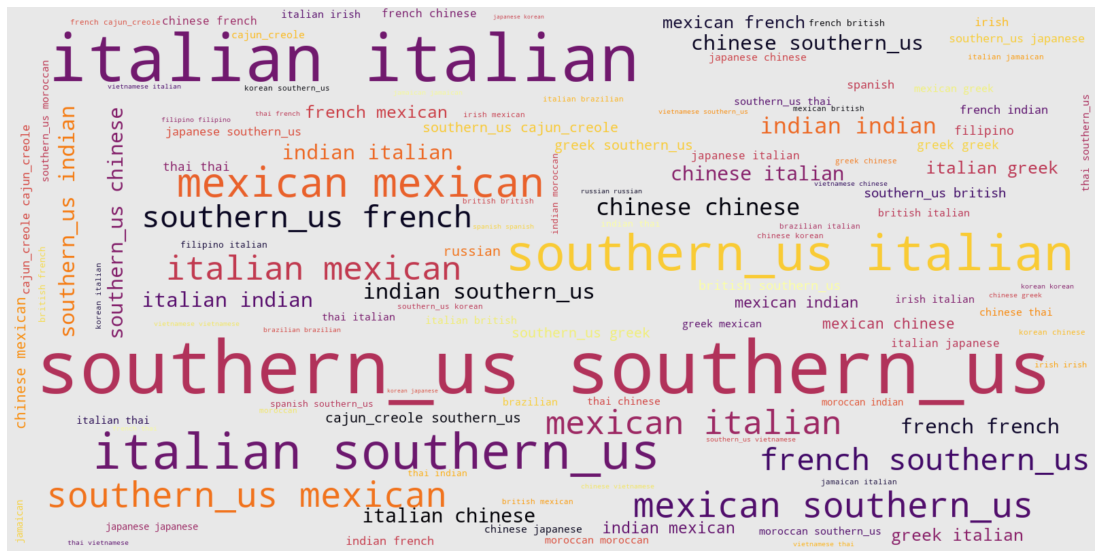

In [47]:
%matplotlib inline
from wordcloud import WordCloud

ser = df_R['cuisine']
textt=ser.str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800, background_color="#E8E8E8",colormap="inferno_r").generate(textt)
plt.figure(figsize=(20,10))
# plt.savefig('topCluster.png', format='png')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('topcluster.png', facecolor='k', bbox_inches='tight')
plt.show()

---
* After successfully integrating cuisine into the data, we can see that the Average rating for each cuisine is more or less the same. There's not much of a trend. 
* The number of ratings per cuisine doesn't specifically give us any information given the high volumes of recipes for specific cuisines.
* But what if we want to understand what kind of recipes become more popular based on some other values available in the data.

> In such senarios, ***Clustering*** comes very handy

**Clustering:**
* Clustering is the process of grouping similar data points based on similarity/distance metrics.
* It can uncover patterns which are previously undiscovered.
* Each group can be assumed as a different class of the data.
* While the data points in a cluster are selected to maximize similarity between them, the clusters should be very dissimilar. 
* Most clustering algorithms deal with noise in the data.
* For example, in social networks, users can be clustered based on their likes and dislikes.

**For this analysis, we will use K-Means clustering.**


**K-Means clustering algorithm:**
* K-means algorithm is a partition based clustering algorithm. 
* **K** here is the number of clusters to be aggregated from the data.
* When we define the **K** value, the algorithm finds the very number of means from the data.
* It will find distance of each of the data points from the means cluusters them to the nearest mean.
* These means are called cluster centers.


*First let's try to cluster the data by nutrition values*

# Clustering by nutritional values

Since our nutrition values have differeng ranges and scales of values, it is important we normalize them. We will use the **Normalizer** function from sklearn for this.

In [32]:
recpData2 = RAW_recipes.copy()

In [34]:
# Taking all the nutrition columns and normalizing them
scaled = Normalizer().fit_transform(recpData2[allNutriList])

Now we apply K-means clustering algorithm on the normalized data.

But to find the optimal value for **K**, we will use the elbow plot. Elbow plot shows us the inertia score for each K value. In this plot, the point where the line bends like an elbow of a hand is considered the optimal value for K.

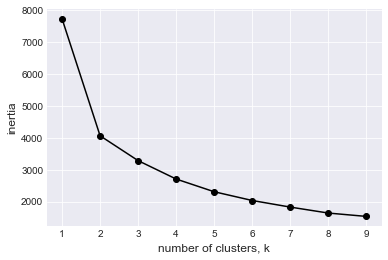

In [35]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(scaled)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

*From the above graph we can see that there is slight bend near the value 4, thus 4 can be considered as the value of K.*

Now to visualize the 4 clusters on a 2D graph, we will use PCA for dimensionality reduction.

**Principal Component Analysis** is a statistical procedure to perform feature extraction, when we have too many features to work with.
* The algorithm is mainly used for reducing features to either limit over fitting the data or to visualize in a 2 dimensional or 3 dimensional plot. 
* It mainly works on the variation of the features available for a data point and brings out strong underlying structures. 
* These help us to understand and visualize the data more easily.
* PCA itself doesn't remove any features, but computes new features as a function of one or more existing features. 

The explained variance ratios are : [0.64729439 0.16230638 0.0998635  0.06000448 0.01652446 0.01197393
 0.00203287]


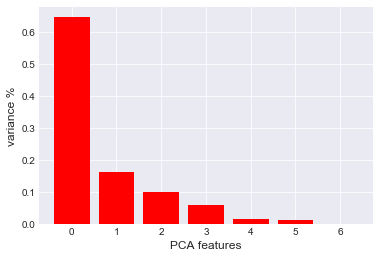

In [36]:
pca = PCA()
principalComponents = pca.fit_transform(scaled)


print("The explained variance ratios are :",pca.explained_variance_ratio_)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='red')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

The above graph shows the explained variance ratios of each Principal component evaluated. Explained variance is the percentage of data explained by a principal component. As we can see, between Principal component 0 and 1, more than 75% of our data is being explained. So we can use the first 2 principal components to visualize the data.

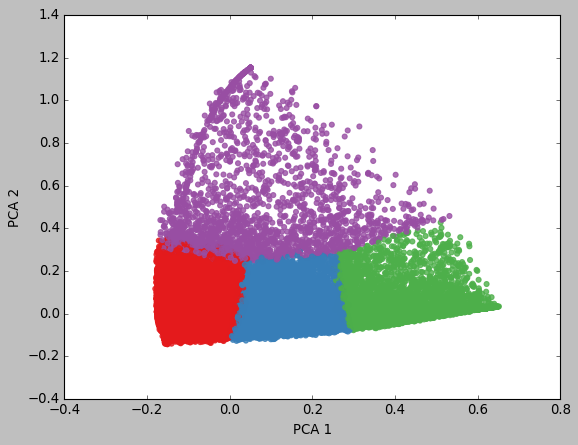

In [37]:
model = KMeans(n_clusters=4)
model.fit(scaled)
colors = plt.get_cmap('Set1',10).colors
with plt.style.context('classic'):
    plt.scatter(PCA_components[0], PCA_components[1], alpha=0.8, color=colors[model.labels_])
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.show()

As we can see clusters are very clearly separated in the data. Let's see some results from our clusters.

#### The number of recipes in each cluster

In [38]:
recpData2['nutr_cluster'] = model.labels_
recpData2['nutr_cluster'].value_counts()

0    117516
1     44572
2     13092
3      2021
Name: nutr_cluster, dtype: int64

#### Let's summaize the data by the cluster and look at some properties

In [41]:
nutr_results = recpData2.groupby(['nutr_cluster']).mean().sort_values("mean_rating",ascending=True)
nutr_results

,minutes,n_steps,n_ingredients,mean_rating,review_count,cal,totalFat,sugar,sodium,protein,satFat,carbs
nutr_cluster,,,,,,,,,,,,
3,31.60,6.66,7.81,4.28,5.30,61.59,2.63,15.36,39.02,5.72,1.94,2.41
1,41.44,9.42,8.75,4.34,5.09,247.92,16.85,72.16,9.40,10.59,22.80,10.13
0,42.10,9.38,9.20,4.37,4.83,340.36,26.63,17.01,22.45,35.29,31.95,8.65
2,30.08,6.86,6.57,4.39,4.24,135.67,3.24,85.32,4.27,3.91,4.85,8.71


As we can see there are no properties that define these clusters appropriately. Thus, clustering through Nutritional values didn't give us any good insights.

***There is one more important field that defines a recipe, ingredients. Ingredients used in a recipe define both the nutritional values and cuisine of the item, thus playing an important role. We will now attempt to cluster based on ingredients to exploratorily search for insights.***

# Clustering by ingredients

The pre-processing through TF-IDF vectorizer has already been explained in the previous section and we will be using the same preprocessing even for this process.

In [42]:
#Tokenizing by spliting by space
def word_splitter(in_string):
    tokens = in_string.split()
    return tokens

#Creating Vectorizer model, with taking top 500 words from the description
vectorize = TfidfVectorizer(max_features=500, tokenizer=word_splitter, stop_words='english')

ingr_matrix = vectorize.fit_transform(recpData2['ingr_str'])

#Converting the spared matrix to dense matrix and creating pandas DF from it
ingr_DF = pd.DataFrame(ingr_matrix.todense(),index=recpData2.index)
ingr_DF.columns=vectorize.get_feature_names()
ingr_DF.head(5)

,active_dry_yeast,allspice,almond_extract,almonds,american_cheese,apple,apple_cider,apple_cider_vinegar,apple_juice,apples,...,worcestershire_sauce,yeast,yellow_bell_pepper,yellow_cake_mix,yellow_cornmeal,yellow_onion,yellow_onions,yellow_squash,yogurt,zucchini
id,,,,,,,,,,,,,,,,,,,,,
137739,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0
31490,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0
112140,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.42,0.0,0.0,0.0
59389,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.52,0.0,0.0,0.0,0.00,0.0,0.0,0.0
5289,0.0,0.0,0.0,0.0,0.0,0.63,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0


Plotting the elbow plot to find the optimal **K**.

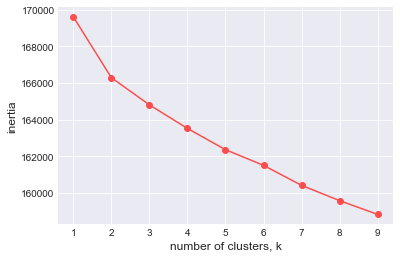

Process completed - 699.0452790260315 seconds elapsed.


In [57]:
start = time.time()
#Passing the vectorized matrix created above to k-Means model for clustering
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, random_state=0)
    
    # Fit model to samples
    model.fit(ingr_DF)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.plot(ks, inertias, '-o', color='#FC4E4E')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.savefig('inertia.png', bbox_inches='tight')
plt.show()
end = time.time()
print("Process completed - %s seconds elapsed." % (end - start))

From the above plot, we cannot discern a **K** value easily. Even though the graph is not straightforward, we have reasonable doubt between values 4,5 & 6.

In this case, we will need another method to find the optimal **K** from the values 4,5 & 6. 

**We will use the silhouette score.**
* Silhouette method measures how similar a point is to it’s own cluster compared to others.
* It is more likely a validation rather than a decision maker. Which is exactly what we want in this scenario.
* By using Euclidean distance as the metric, we will plot the graph for silhouette scores for the three values of K.

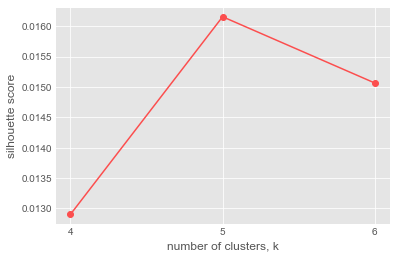

Process completed - 1973.9899640083313 seconds elapsed.


In [59]:
start = time.time()
#Passing the vectorized matrix created above to k-Means model for clustering
ks = range(4, 7)
sil = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, random_state=0)
    
    # Fit model to samples
    model.fit(ingr_DF)
    labels = model.labels_
    sil.append(silhouette_score(ingr_DF, labels, metric = 'euclidean'))

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,5))
plt.plot(ks, sil, '-o', color='#FC4E4E')
plt.xlabel('number of clusters, k')
plt.ylabel('silhouette score')
plt.xticks(ks)
plt.savefig('silh.png', bbox_inches='tight')
plt.show()
end = time.time()
print("Process completed - %s seconds elapsed." % (end - start))

From the above graph, we can confidently say that the **5** is the most optimal value for **K**.

In [43]:
model = KMeans(n_clusters=5, random_state=0)
model.fit(ingr_DF)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

#### Let's look at the number of recipes in each cluster

In [52]:
recpData2['ingr_cluster'] = model.labels_
recpData2['ingr_cluster'].value_counts()

0    80109
3    28961
4    25476
2    23507
1    19148
Name: ingr_cluster, dtype: int64

#### Now the top-ingredients in each of our clusters.

In [51]:
print('\nCrucial ingredients for each clusters: \n')
features = vectorize.get_feature_names()
centroids = model.cluster_centers_.argsort()[:,::-1]
for clust in range(0,5):
    print('Cluster '+str(clust)+': ')
    for ind in centroids[clust, :15]:
        print(features[ind]+' ', end='')
    print()
    print()


Crucial ingredients for each clusters: 

Cluster 0: 
salt onion mayonnaise garlic_cloves pepper sugar extra_virgin_olive_oil vegetable_oil garlic tomatoes lemon_juice salt_and_pepper parmesan_cheese sour_cream black_pepper 

Cluster 1: 
water salt onion sugar butter pepper vegetable_oil oil cornstarch eggs flour garlic_cloves garlic soy_sauce lemon_juice 

Cluster 2: 
sugar baking_powder eggs baking_soda flour salt vanilla butter egg milk cinnamon vanilla_extract brown_sugar granulated_sugar unsalted_butter 

Cluster 3: 
butter milk salt eggs pepper onion flour parmesan_cheese cheddar_cheese salt_and_pepper egg sugar sour_cream brown_sugar potatoes 

Cluster 4: 
olive_oil garlic_cloves salt onion garlic salt_and_pepper parmesan_cheese pepper tomatoes garlic_clove black_pepper lemon_juice fresh_parsley balsamic_vinegar fresh_ground_black_pepper 



#### Summarizing the data on Cluster number to look at some properties

In [54]:
ingr_results = recpData2.groupby(['ingr_cluster']).mean().sort_values("mean_rating",ascending=True)
ingr_results

,minutes,n_steps,n_ingredients,mean_rating,review_count,cal,totalFat,sugar,sodium,protein,satFat,carbs,nutr_cluster
ingr_cluster,,,,,,,,,,,,,
2,46.13,10.82,9.87,4.22,5.95,252.26,17.05,67.15,9.57,9.07,24.30,10.79,0.86
1,48.56,9.86,9.52,4.27,5.12,293.16,19.39,37.32,20.33,27.42,22.60,9.76,0.49
3,43.41,9.69,8.31,4.38,5.17,338.14,27.95,31.41,19.62,27.99,45.23,9.23,0.29
0,36.01,8.07,8.16,4.40,4.44,284.89,20.77,32.69,18.77,28.03,23.74,8.04,0.44
4,43.01,10.04,10.38,4.43,4.61,345.05,26.78,21.26,19.87,34.83,24.40,9.22,0.13


There are 2 features that define our clusters very well in terms of popularity. 

* As we can see the cluster that has the highes average rating has the lowest sugar values and the highest protein values and
* the cluster with the least average rating has the highest sugar values and the least protein values.

> Thus it shows us that recipes that contain less sugars and more proteins are more prone to beome popular than the sugary sweets and cakes with less protein value. 

*People on Food.com turned out to be healthy makers or eaters.*

**Please see below for bar-plots showing the sugar and protein levels of each cluster. Darker the color of bar, higher it's average rating.**

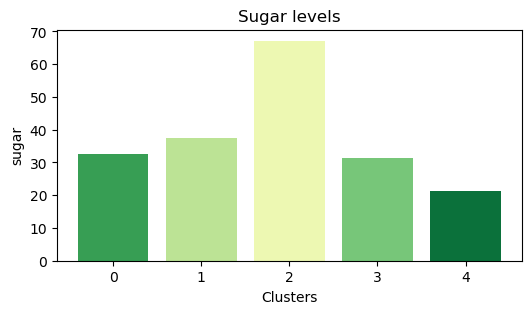

In [60]:
plt.style.use('default')
fig,ax = plt.subplots(1,figsize=(6,3))
ax.bar(ingr_results.index,ingr_results.sugar,color=sns.color_palette("YlGn",5))
ax.set(title="Sugar levels",xlabel="Clusters",ylabel="sugar")
plt.savefig('sugar.png', bbox_inches='tight')
plt.show()

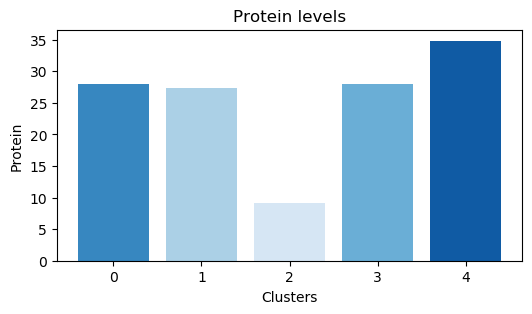

In [61]:
fig,ax = plt.subplots(1,figsize=(6,3))
ax.bar(ingr_results.index,ingr_results.protein,color=sns.color_palette("Blues",5))
ax.set(title="Protein levels",xlabel="Clusters",ylabel="Protein")
plt.savefig('protein.png', bbox_inches='tight')
plt.show()

**Let's make word clouds for our most popular and least popular clusters and look at the ingredients precedence in them.**

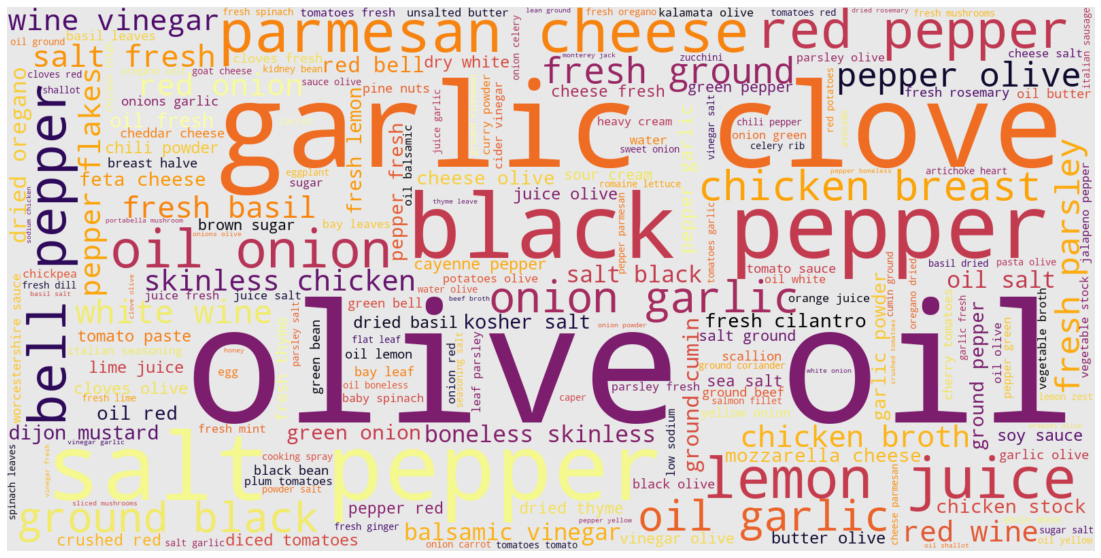

In [63]:
%matplotlib inline
from wordcloud import WordCloud

ser = pd.Series(recpData2[recpData2["ingr_cluster"]==4]["ingr_str"].apply(lambda x: x.replace("_"," ")))
textt=ser.str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800, background_color="#E8E8E8",colormap="inferno_r").generate(textt)
plt.figure(figsize=(20,10))
# plt.savefig('topCluster.png', format='png')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('topcluster.png', facecolor='k', bbox_inches='tight')
plt.show()

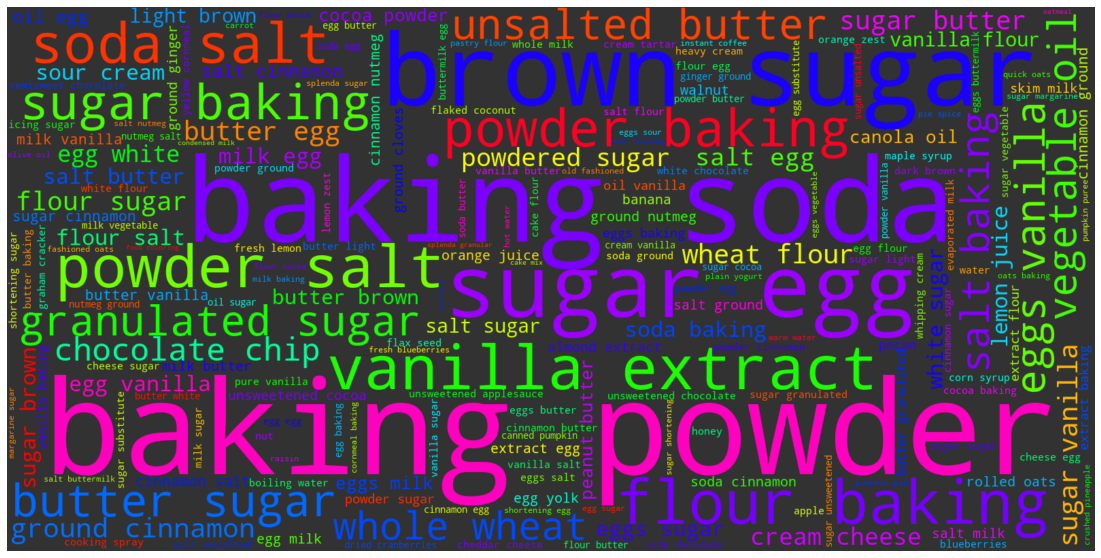

In [56]:
%matplotlib inline
from wordcloud import WordCloud

ser = pd.Series(recpData2[recpData2["ingr_cluster"]==2]["ingr_str"].apply(lambda x: x.replace("_"," ")))
textt=ser.str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800, background_color="#323232",colormap="gist_rainbow").generate(textt)
plt.figure(figsize=(20,10))
# plt.savefig('topCluster.png', format='png')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('last.png', facecolor='k', bbox_inches='tight')
plt.show()

# Regression

After classification and clustering, now we will see regression analysis. As we know regression analysis is done when we want to predict continious value.
In our dataset we have nutritional values as 'cal', 'totalFat', 'sugar', 'sodium', 'protein', 'satFat', 'carbs' for each receipes. But we saw that for many of the receipes the nutritional values except calories and carbs are zero/missing.
Hence we created a model using Gradient Boosting to predict the 'totalFat', 'sugar',   'sodium', 'protein', 'satFat' using values of 'cal','carbs'

On the similar lines are also predicting number of ingredients which will be used in a dish using the number of steps and time required to make the dish.

In [30]:
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
testdf4totalFat=pd.DataFrame()
def mean_squared_error_(ground_truth, predictions):
    return mean_squared_error(ground_truth, predictions) ** 0.5

def GradientBoostingRegressor_function(X_train, y_train,X_test):
    gbrt=GradientBoostingRegressor(n_estimators=12, learning_rate=1, max_depth=2, random_state=0) 
    gbrt.fit(X_train, y_train) 
    return(gbrt.predict(X_test))

def r2scoreFun(y_test, y_pred):
    r2score=r2_score(y_test, y_pred)
    return r2score
    
def toPredict(col_predictors,col_to_predict):
    predictedDF=pd.DataFrame(columns=['Predicted','with error','R2 Score'])
    for i,col in enumerate(col_to_predict):
        X=RAW_recipes[col_predictors]
        y=RAW_recipes[[col]]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)
        y_pred=GradientBoostingRegressor_function(X_train, y_train,X_test)
        y_test=y_test.reset_index(drop=True)
        RMSE=mean_squared_error_(y_test, y_pred)
        r2score=r2scoreFun(y_test, y_pred)
        predictedDF.loc[i]=[col,RMSE,r2score]
        
        if(col=='totalFat'):
            testdf4totalFat[col+'_y_pred']=y_pred
            testdf4totalFat[col+'_y_test']=y_test
            testdf4totalFat[col+'_abs_diff']=testdf4totalFat.apply(lambda x : abs(x[col+'_y_pred']-x[col+'_y_test']), axis=1)
        
        testdf=pd.DataFrame()
        testdf[col+'_y_pred']=y_pred
        testdf[col+'_y_test']=y_test
        testdf[col+'_abs_diff']=testdf.apply(lambda x : abs(x[col+'_y_pred']-x[col+'_y_test']), axis=1)
        print()
        print("Some of the predicted values:")
        print(testdf.sort_values(by=[col+'_abs_diff']).reset_index(drop=True).head(5))
        print()
    print("\n\n-----Predicting using "+str(col_predictors)+'-----\n')
    print(predictedDF.sort_values(by=['with error']).reset_index(drop=True))
    return predictedDF
    
col_predictors_nutri=['cal','carbs']
col_to_predict_nutri=['totalFat', 'sugar',   'sodium', 'protein', 'satFat']
Nutri_predictedDF=toPredict(col_predictors_nutri,col_to_predict_nutri)
print("\n\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
col_predictors_ingre=['n_steps','minutes']
col_to_predict_ingre=['n_ingredients']
cont_predictedDF=toPredict(col_predictors_ingre,col_to_predict_ingre)


Some of the predicted values:
   totalFat_y_pred  totalFat_y_test  totalFat_abs_diff
0             8.04              8.0               0.04
1             8.04              8.0               0.04
2             2.93              3.0               0.07
3            12.92             13.0               0.08
4            12.92             13.0               0.08


Some of the predicted values:
   sugar_y_pred  sugar_y_test  sugar_abs_diff
0         16.77          17.0            0.23
1         16.77          17.0            0.23
2         16.77          17.0            0.23
3          1.28           1.0            0.28
4          1.28           1.0            0.28


Some of the predicted values:
   sodium_y_pred  sodium_y_test  sodium_abs_diff
0          19.02           19.0             0.02
1          13.92           14.0             0.08
2          19.34           19.0             0.34
3          19.34           19.0             0.34
4          11.74           11.0             0.74


Som

As we are predicting continuous value we can not measure accuracy but we can calculate the distance of actual and predicted value, which will be the error. One of the measure of error is Root Mean Square Error (RMSE). 

So let's see what is the RMSE for different nutritional values predicted from Calories and Carbs.

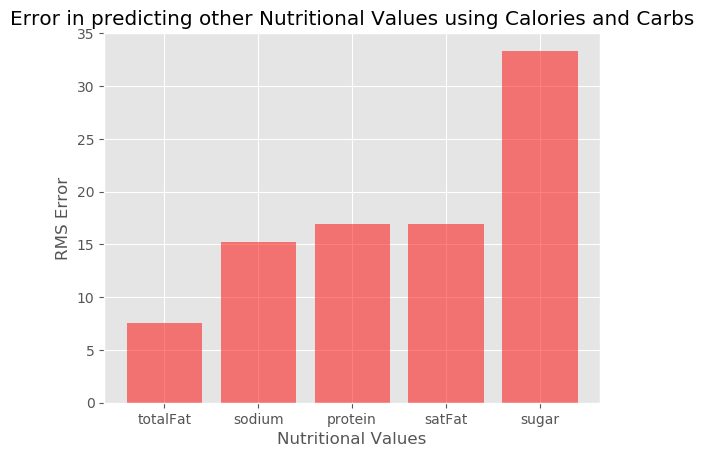

In [72]:
Nutri_predictedDF=Nutri_predictedDF.sort_values(by=['with error']).reset_index(drop=True)
plt.style.use('ggplot')
plt.bar(Nutri_predictedDF['Predicted'], Nutri_predictedDF['with error'], align='center', alpha=0.5,color='red')
plt.xlabel('Nutritional Values')
plt.ylabel('RMS Error')
plt.title('Error in predicting other Nutritional Values using Calories and Carbs')
plt.show()

So as we can see we are able to predict TotalFat with least error and Sugar with highest error. This means we are able to predict TotalFat with most accuracy and Sugar with least accuracy.

Further let's see the R-squared (R2) Score, which represents how good the regression line fits the data. So below graph represents R2 Score for predicting values.

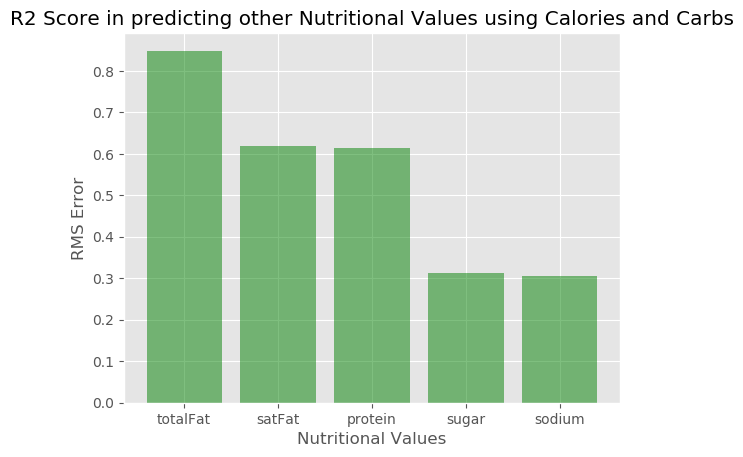

In [73]:
Nutri_predictedDF=Nutri_predictedDF.sort_values(by=['R2 Score'],ascending=False).reset_index(drop=True)
plt.style.use('ggplot')
plt.bar(Nutri_predictedDF['Predicted'], Nutri_predictedDF['R2 Score'], align='center', alpha=0.5,color='green')
plt.xlabel('Nutritional Values')
plt.ylabel('RMS Error')
plt.title('R2 Score in predicting other Nutritional Values using Calories and Carbs')
plt.show()

To vizulize how our actual and predicted values differs, let plot these values for smaple data.
So we are taking 200 actual and predicted values for TotalFat to plot.

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


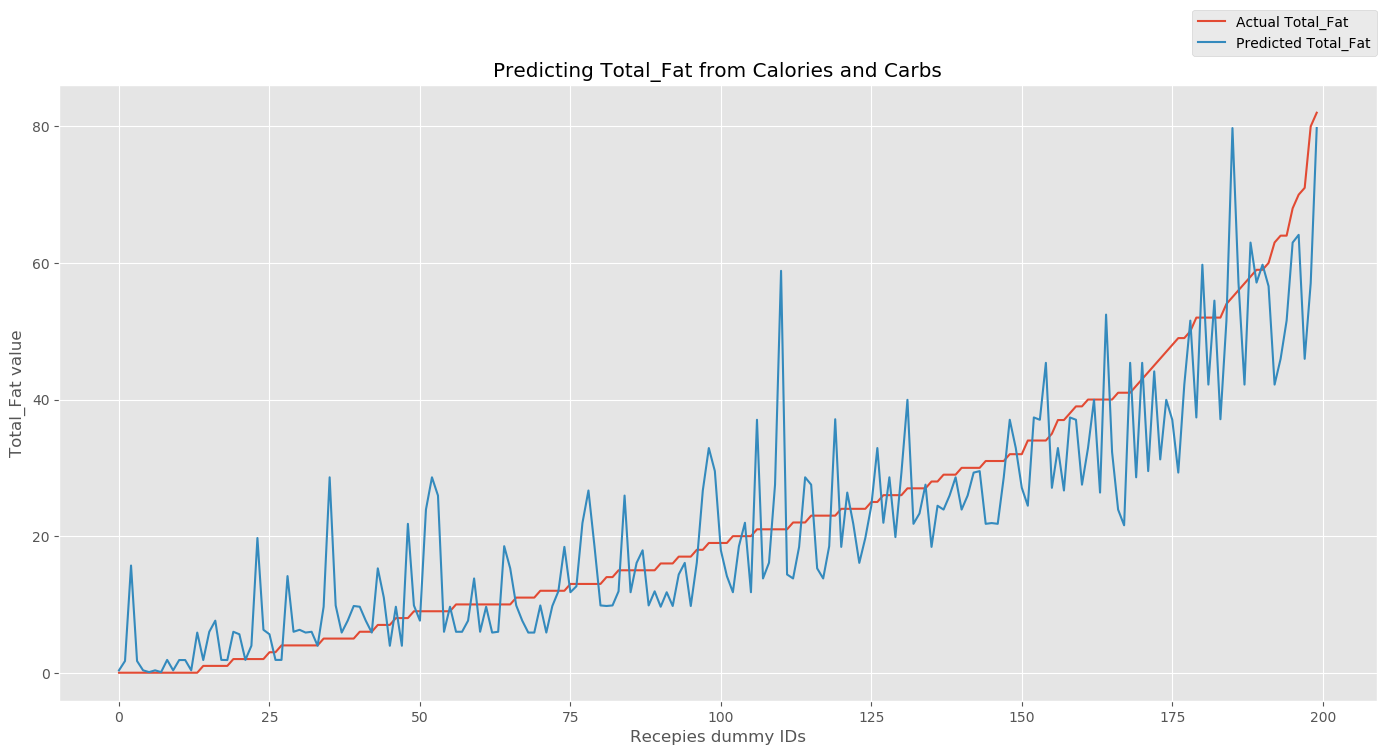

In [74]:
testdf4totalFat2h=testdf4totalFat.head(200)
testdf4totalFat2h=testdf4totalFat2h.sort_values(by='totalFat_y_test')
testdf4totalFat2h['rrange']=range(len(testdf4totalFat2h))

fig = plt.figure(figsize=(17, 8))
plt.xlabel('Recepies dummy IDs')
plt.ylabel('Total_Fat value')
plt.title('Predicting Total_Fat from Calories and Carbs')
ax = plt.axes()

x = testdf4totalFat2h['rrange']
y = testdf4totalFat2h['totalFat_y_test']
z = testdf4totalFat2h['totalFat_y_pred']
plt.plot(x, y,label='Actual Total_Fat')
plt.plot(x, z,label='Predicted Total_Fat')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='best', borderaxespad=0.)

# Apriori

As initially informed Food.com provides option to buy ingredients for a receipe in their portal. If we consider ingredients of a receipe are bought together, then we can consider them as items of a order/transaction. Some what like below:

In [24]:
# TODO sample/filter with cusine OR any other criteria
RAW_recipes=RAW_recipes.head(1000)
ingredients_list = RAW_recipes['ingredients'].tolist()
RAW_recipes[['name','ingredients']].head(10)

,name,ingredients
id,,
137739,arriba baked winter squash mexican style,"['winter squash', 'mexican seasoning', 'mixed ..."
31490,a bit different breakfast pizza,"['prepared pizza crust', 'sausage patty', 'egg..."
112140,all in the kitchen chili,"['ground beef', 'yellow onions', 'diced tomato..."
59389,alouette potatoes,"['spreadable cheese with garlic and herbs', 'n..."
44061,amish tomato ketchup for canning,"['tomato juice', 'apple cider vinegar', 'sugar..."
5289,apple a day milk shake,"['milk', 'vanilla ice cream', 'frozen apple ju..."
25274,aww marinated olives,"['fennel seeds', 'green olives', 'ripe olives'..."
67888,backyard style barbecued ribs,"['pork spareribs', 'soy sauce', 'fresh garlic'..."
70971,bananas 4 ice cream pie,"['chocolate sandwich style cookies', 'chocolat..."


Can you guess what analysis we can do here to increase the items sale?

We can do Market Basket Analysis, which analyzes which items are frequently bought together and hence suggest items to buy based on the items on cart. By implementing this, user can get suggestion more items to add based on what s/he is buying at present.

We are using Apriori algorithm to implement Market Basket Analysis. 
So first like below are creating list of items/ingredients bought together.

In [28]:
RAW_recipes_i=RAW_recipes.reset_index()
def Convert_nutri(string): 
    li = list(string.split('\', \'')) 
    return li
allIngredList=[]
for ind in range(len(RAW_recipes)):
    ss=RAW_recipes_i.loc[ ind , 'ingredients' ]
    ss=ss[2:-2]
    allIngredList.append(Convert_nutri(ss))
records=allIngredList
print("Showing first to list of ingredients:")
records[0:2]

Showing first to list of ingredients:


[['winter squash',
  'mexican seasoning',
  'mixed spice',
  'honey',
  'butter',
  'olive oil',
  'salt'],
 ['prepared pizza crust',
  'sausage patty',
  'eggs',
  'milk',
  'salt and pepper',
  'cheese']]

We get the below results once this list is passed to apriori model with the desired values for parameters of Support, Confidence and Lift.

In [29]:
# TODO tune apriori parameters
associationRules = apriori(records, min_support=0.0050, min_confidence=0.6, min_lift=3, min_length=5,max_length=None)
associationResult = list(associationRules)

print("\n\nNumber of Rules:")
print(len(associationResult))

print("\n\nExample of a rule:")
print(associationResult[0])
print("\n\n")

associationResult10=associationResult[0:10]

print("Listing 10 of the rules:\n")
for item in associationResult10:
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " --> " + items[1])
    print("Support: " + str(item[1]))
    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")



Number of Rules:
1076


Example of a rule:
RelationRecord(items=frozenset({'cinnamon', 'allspice'}), support=0.007, ordered_statistics=[OrderedStatistic(items_base=frozenset({'allspice'}), items_add=frozenset({'cinnamon'}), confidence=0.7777777777777779, lift=12.544802867383515)])



Listing 10 of the rules:

Rule: cinnamon --> allspice
Support: 0.007
Confidence: 0.7777777777777779
Lift: 12.544802867383515
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Rule: low-fat buttermilk --> baking powder
Support: 0.005
Confidence: 1.0
Lift: 13.157894736842106
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Rule: baking soda --> ground cloves
Support: 0.006
Confidence: 0.6
Lift: 8.108108108108109
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Rule: baking soda --> low-fat buttermilk
Support: 0.005
Confidence: 1.0
Lift: 13.513513513513514
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Rule: baking soda --> unsweetened cocoa
Support: 0.005
Confidence: 0.7142857142857143
Lift: 9.652509652509654
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Rule: onion --> 

# Conlusion

To summarize the blog, let's see what all we did. We started with selecting interesting data. We choose data of Food.com from kaggle. To understand the data first we did the data analysis, where we saw different data files and there length, central tendency metric for various columns/features, the relation between the features and the outlier analysis. Once we analyzed the data and saw the issues, we worked upon to resolve them by handling outliers. 

Then we started with classification where we introduced the new column as Cusine for our data set. Using the new column we analysed our data and came up with interesting analysis. Second, we performed clustering over the ingredients, for that we performed PCA, vectorization and K-means. Analysing cluster over rating and review provides us with meaningful insights. After that, we saw regression where by help of Carbs and Calories we predected other nutritional values using Gradient Boosting Regression. Last but not the least we performed Market Basket Analysis which can be profitable for the sales.

We hope this blog will be helpful, for any suggestions please email at any of the following: 
agupta33@student.gsu.edu
sdasari3@student.gsu.edu
sdawani1@student.gsu.edu

# Credits and References

* http://www.ultravioletanalytics.com/blog/tf-idf-basics-with-pandas-scikit-learn
* https://medium.com/datadriveninvestor/an-introduction-to-grid-search-ff57adcc0998
* https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb
* https://www.kaggle.com/etsc9287/food-com-eda-and-text-analysis